In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from fccd.deformation import estimate_stress_plastic_deformation_point

from fccd.deformation import CRYSTAL_ORIENTATION_100, DISLOCATION_MOVEMENT_METHOD, DISLOCATION_SOURCE_ACTIVATION_METHOD, DISLOCATION_REACTION_METHOD

%load_ext autoreload
%autoreload 2

# Plotting stress strain curves

This notebook provides insights into stress, strain and dislocation density curves

In [21]:
# Read data
al = pd.read_csv("../data/processed/cu_125.csv", index_col=0)


# Specify number of plots and time steps
T = 400
num_plots = 4

al = al.tail(num_plots * T)

# Unit conversion
# GPa to MPa
al["stress"] = al["stress"] * 1000

# 0.01 to 1%
al["strain"] = al["strain"] * 100

In [25]:
# Prepare Plots

stress_p = []
ids = []

for idx in range(num_plots):
    first_element = al.iloc[idx * T, :]
    
    id_ = first_element["id"]
    E = first_element["E"]
    nu = first_element["nu"]
    burger_vector = first_element["burger"]
    rho_lomer0 = first_element["rho_lomer0"]
    rho0 = first_element["rho0"]
    rho_S0 = first_element["rho_S0"]
    crystal_orienation = first_element["euler_angles"]
    c_FR = first_element["c_FR"]
    c_FR_multi = first_element["c_FR_multi"]

    stress_plastic_def_point = estimate_stress_plastic_deformation_point(DISLOCATION_MOVEMENT_METHOD, E, nu,
                                                                         rho_lomer0, rho0, rho_S0, burger_vector, crystal_orienation, c_FR, None, c_FR_multi)


    stress_p += [stress_plastic_def_point * 1000] * T
    ids += ["plastic_deformation_point_"+ id_] * T
    
p_df = pd.DataFrame({"stress": stress_p, "id": ids})


## Plotting Stress-Strain curves

The following shows an excerpt of *n_plots* stress-strain curves with their corresponding PSD (=yield strength) as a vertcial line in the same color.

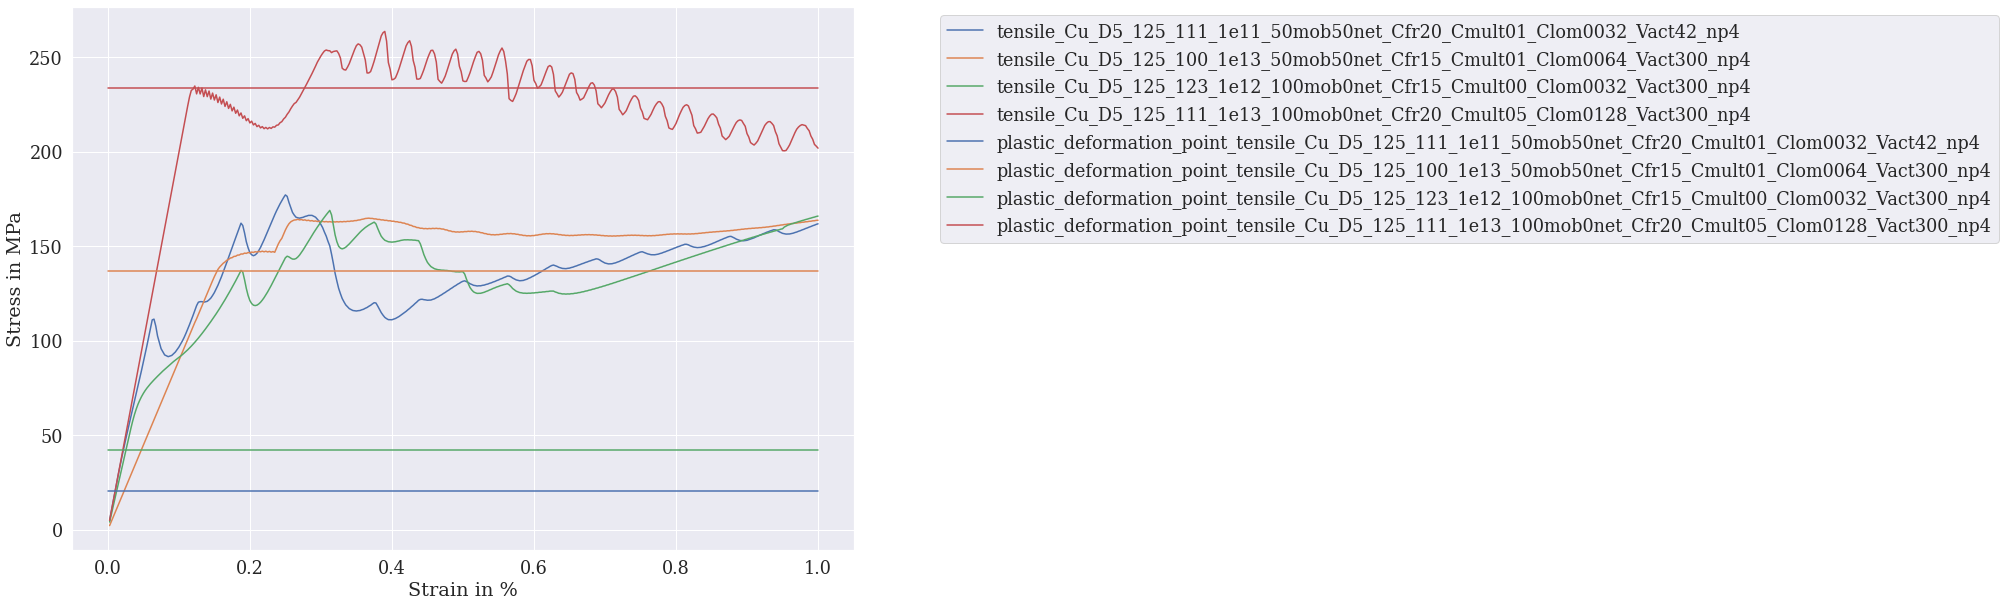

In [26]:
# Plot Stress Strain curves

p_df["x"] = list(np.linspace(0, 1, 400)) * int(p_df.shape[0] / T)
assert (p_df.shape[0] / T) % 1 == 0

plt.figure(figsize=(14,10))
sns.lineplot(data=al, x="strain", y="stress", hue="id")
sns.lineplot(data=p_df, x="x", y="stress", hue="id")

plt.xlabel("Strain in %")
plt.ylabel("Stress in MPa")

plt.legend(loc = 2, bbox_to_anchor = (1.1,1))
sns.set(font_scale=1.6)
sns.set_style({'font.family':'serif', 'font.serif':'Linux Libertine O'})

plt.show()

The numerical PSD values look like this:

In [27]:
for idx, val in p_df.groupby("id").mean().iterrows():
    print(idx, ": \t\t\t\t", val["stress"])

plastic_deformation_point_tensile_Cu_D5_125_100_1e13_50mob50net_Cfr15_Cmult01_Clom0064_Vact300_np4 : 				 136.92586083578553
plastic_deformation_point_tensile_Cu_D5_125_111_1e11_50mob50net_Cfr20_Cmult01_Clom0032_Vact42_np4 : 				 20.792445534322987
plastic_deformation_point_tensile_Cu_D5_125_111_1e13_100mob0net_Cfr20_Cmult05_Clom0128_Vact300_np4 : 				 233.81025087320592
plastic_deformation_point_tensile_Cu_D5_125_123_1e12_100mob0net_Cfr15_Cmult00_Clom0032_Vact300_np4 : 				 42.47461530314254


## Plotting the Dislocation over time

Next, we plot the dislocation over time.

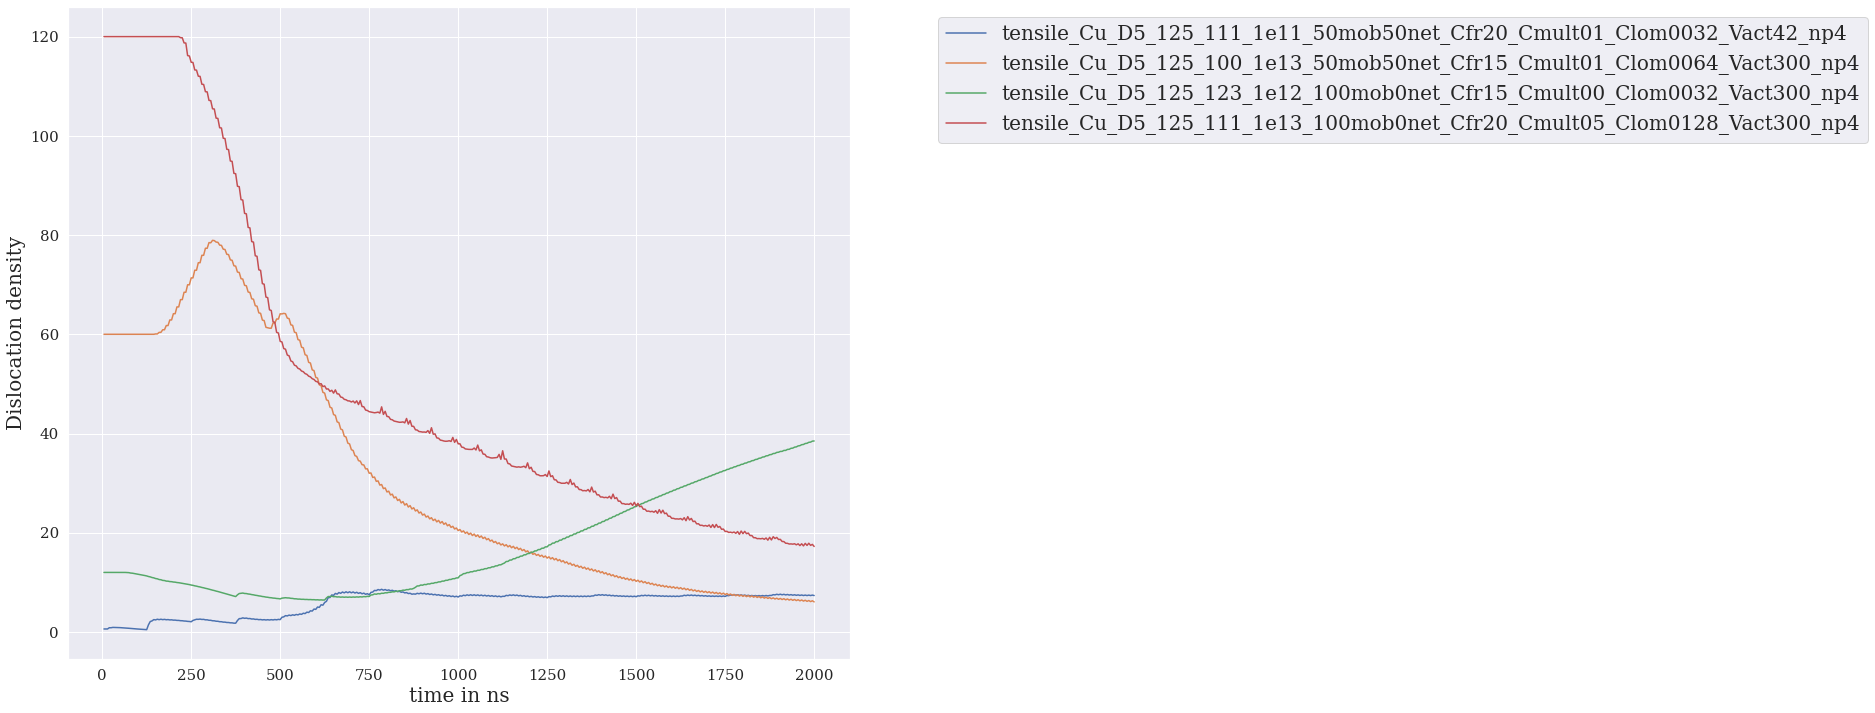

In [29]:
plt.figure(figsize=(14,12))
sns.lineplot(data=al, x="time_ns", y="dislocation", hue="id")
plt.xlabel("time in ns", size=20)
plt.ylabel("Dislocation density", size=20)

plt.legend(loc = 2, bbox_to_anchor = (1.1,1), fontsize='20')

plt.xticks(size=15)
plt.yticks(size=15)


plt.show()